# Prediction using Supervised ML

# NAME : Abdul Hakeem Amer

# GRIP-The Spark Foundation

# Data Science & Business Analytics Internship

# BATCH : FEBRUARY 2023

# Task-1

To predict the percentage of marks of the students based on the number of hours they 
studied

# Language Python

In [1]:
#Importing important python libraries needed:-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [2]:
data=pd.read_csv('dataset.csv')
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.head(26)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# First Five Elements in the Dataset

In [4]:
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Last Five Elements in the Dataset

In [5]:
data.tail(5)

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
#We can see we have 25 rows and 2 columns

In [7]:
#Checking for necessary statistics from the data

data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
data.shape

(25, 2)

# Visualing the Data:-

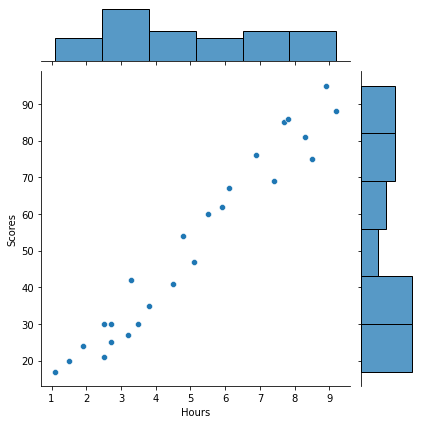

In [10]:
sns.jointplot(x='Hours',y='Scores',data=data)

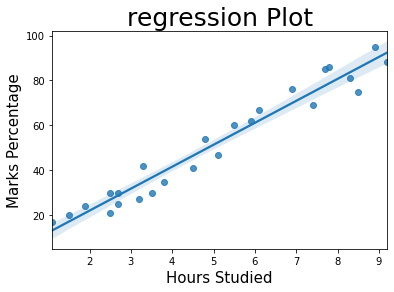

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [11]:
sns.regplot(x=data['Hours'],y=data['Scores'])
plt.title('regression Plot',size=25)
plt.ylabel('Marks Percentage',size=15)
plt.xlabel('Hours Studied',size=15)
plt.show()
print(data.corr())

In [12]:
from sklearn.model_selection import train_test_split

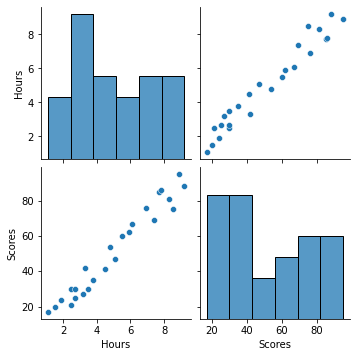

In [13]:
sns.pairplot(data)

<AxesSubplot:>

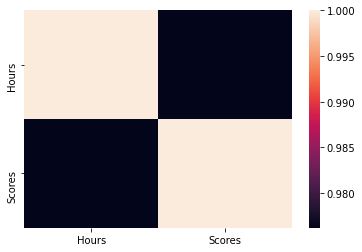

In [14]:
sns.heatmap(data.corr())

# Training a Linera Regression Model

Lets now begin to train out regression model We will need to first split up our data into an X array that contains the feature to
train on,and a y array with the target variable.

# X and y arrays

In [15]:
X = data[['Hours']]
y = data['Scores']

# Train Test Split

Now let's split the data into a training set and testing set.We train out model on the training set and then use the test set
to evaluate the model

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=0)

# Creating and Training the Model

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lm= LinearRegression()

In [20]:
lm.fit(X_train,y_train)

LinearRegression()

# Predictions from our Models

Let's grab predictions off our test set and see how well it did

In [21]:
predictions = lm.predict(X_test)

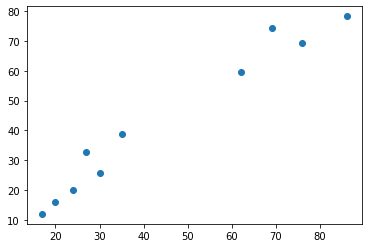

In [22]:
plt.scatter(y_test,predictions,)

In [23]:
# defining Xand y from the data
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

#Spliting the data in two
train_X, val_x, train_y, val_y = train_test_split(x, y, random_state=0)

In [24]:
regression = LinearRegression()
regression.fit(train_X,train_y)
print("---------Model Trained---------")

---------Model Trained---------


In [25]:
pred_y = regression.predict(val_x)
prediction = pd.DataFrame({'Hours':[i[0] for i in val_x],'Predicted Marks':[k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [26]:
pd.DataFrame({'Actual Marks':y_test,'predicted Marks':predictions})

,Actual Marks,predicted Marks
5,20,15.947762
2,27,32.773947
19,69,74.344523
16,30,25.845518
11,62,59.497889
22,35,38.712601
17,24,19.906864
24,86,78.303625
23,76,69.395645
14,17,11.988659


<AxesSubplot:xlabel='Scores', ylabel='Density'>

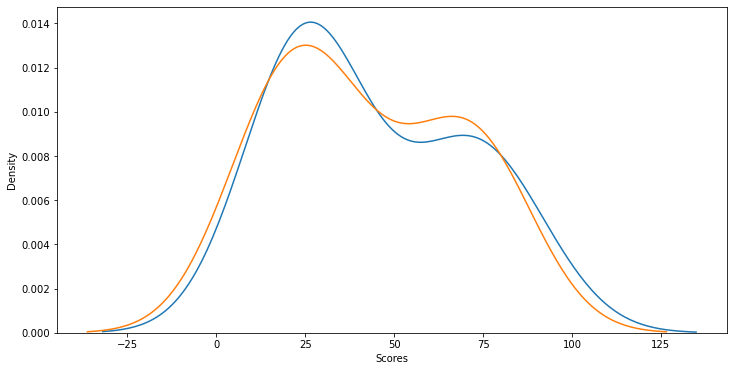

In [27]:
plt.figure(figsize=(12,6))
sns.kdeplot(y_test,label='Actual Marks')
sns.kdeplot(predictions,label='Predicted Marks')

# Predicting the score if a student studies for 9.25 hours/days

In [28]:
hrs=[[9.25]]
pred=lm.predict(hrs)
print(pred)

[92.65537185]


# Evaluating the model using matrics:-

In [29]:
from sklearn import metrics
met=metrics.explained_variance_score(y_test,predictions)
print(met)

0.9628335191378917


#                                               Thank You!